# **1. Define classes and objects, and tests their functionality**

In [ ]:
# Menu Class

# Menu class represents a restaurant menu
class Menu:
    # Constructor initializes name, items, start_time, and end_time properties
    def __init__(self, name, items, start_time, end_time):
        self.name = name
        self.items = items
        self.start_time = start_time
        self.end_time = end_time

    # __repr__ method returns a string representation of the menu
    def __repr__(self):
        return f"{self.name} menu available from {self.start_time} to {self.end_time}"

    # calculate_bill method calculates the bill for a list of purchased items
    def calculate_bill(self, purchased_items):
        bill = 0
        item_counts = {}

        # Iterate over the purchased items and count the number of each item
        for purchased_item in purchased_items:
            if purchased_item in self.items:
                if purchased_item not in item_counts:
                    item_counts[purchased_item] = 1
                else:
                    item_counts[purchased_item] += 1
            else:
                # If an item is not in the menu, print an error message
                print(f"Sorry, we don't have {purchased_item} on the menu.")

        # Iterate over the counted items and add up the prices
        for item, count in item_counts.items():
            bill += self.items[item] * count

        return bill

    # add_item method adds a new item to the menu's items dictionary
    def add_item(self, name, price):
        self.items[name] = price

# Franchise Class

# Franchise class represents a restaurant franchise
class Franchise:
    # Constructor initializes address and menus properties
    def __init__(self, address, menus):
        self.address = address
        self.menus = menus

    # __repr__ method returns a string representation of the franchise
    def __repr__(self):
        return f"Franchise at {self.address}"

    # available_menus method returns a list of menus that are available at a given time
    def available_menus(self, time):
        available_menus = []

        # Iterate over the menus and check if they are available at the given time
        for menu in self.menus:
            if time >= menu.start_time and time < menu.end_time:
                available_menus.append(menu)

        return available_menus

    # add_menu method adds a new menu to the franchise's menus list
    def add_menu(self, menu):
        self.menus.append(menu)

    # remove_menu method removes a menu from the franchise's menus list
    def remove_menu(self, menu):
        self.menus.remove(menu)

# Business Class

# Business class represents a restaurant business
class Business:
    # Constructor initializes name and franchises properties
    def __init__(self, name, franchises):
        self.name = name
        self.franchises = franchises

    # __repr__ method returns a string representation of the business
    def __repr__(self):
        return f"{self.name} Business"

    # total_revenue method calculates the total revenue for the business
    def total_revenue(self):
        total = 0

        # Iterate over the franchises, menus, and items to calculate the total revenue
        for franchise in self.franchises:
            for menu in franchise.menus:
                for item_price in menu.items.values():
                    total += item_price

        return total

# Menus

# Define menu items as dictionaries with item names as keys and item prices as values
brunch_items = {
    "pancakes": 7.50,
    "waffles": 9.00,
    "burger": 11.00,
    "home fries": 4.50,
    "coffee": 1.50,
    "espresso": 3.00,
    "tea": 1.00,
    "mimosa": 10.50,
    "orange juice": 3.50,
}

early_bird_items = {
    "salumeria plate": 8.00,
    "salad and breadsticks (serves 2, no refills)": 14.00,
    "pizza with quattro formaggi": 9.00,
    "duck ragu": 17.50,
    "mushroom ravioli (vegan)": 13.50,
    "coffee": 1.50,
    "espresso": 3.00,
}

dinner_items = {
    "crostini with eggplant caponata": 13.00,
    "ceaser salad": 16.00,
    "pizza with quattro formaggi": 11.00,
    "duck ragu": 19.50,
    "mushroom ravioli (vegan)": 13.50,
    "coffee": 2.00,
    "espresso": 3.00,
}

kids_items = {
    "chicken nuggets": 6.50,
    "fusilli with wild mushrooms": 12.00,
    "apple juice": 3.00,
}

arepas_items = {
    "arepa pabellon": 7.00,
    "pernil arepa": 8.50,
    "guayanes arepa": 8.00,
    "jamon arepa": 7.50,
}

# Create Menu objects for each menu type, passing in the corresponding item dictionary and operating hours
brunch_menu = Menu("Brunch", brunch_items, 11, 16)
early_bird_menu = Menu("Early Bird", early_bird_items, 15, 18)
dinner_menu = Menu("Dinner", dinner_items, 17, 23)
kids_menu = Menu("Kids", kids_items, 11, 21)

# Create a list of all the menu objects
menus = [brunch_menu, early_bird_menu, dinner_menu, kids_menu]

# Create a Menu object for a new menu type
arepas_menu = Menu("Take a' Arepa", arepas_items, 10, 20)

# Franchises

# Create Franchise objects for each location, passing in the address and list of available menus
flagship_address = "1232 West End Road"
flagship_menus = [brunch_menu, early_bird_menu, dinner_menu, kids_menu]
flagship_store = Franchise(flagship_address, flagship_menus)

installment_address = "12 East Mulberry Street"
installment_menus = [brunch_menu, early_bird_menu, kids_menu, dinner_menu]
new_installment = Franchise(installment_address, installment_menus)

arepas_address = "189 Fitzgerald Avenue"
arepas_place = Franchise(arepas_address, [arepas_menu])

# Businesses

# Create Business objects for each restaurant brand, passing in the name and list of Franchise objects
Basta = Business("Basta Fazoolin' with my Heart", [flagship_store, new_installment])
Arepa = Business("Take a' Arepa", [arepas_place])

# Testing code to verify the functionality of the classes

# Adding a new item to the brunch menu
brunch_menu.add_item("juice", 2.50)
print("\n*** Updated brunch menu items ***")
for item, price in brunch_menu.items.items():
    print(f"{item}: ${price}")

# Removing the kids menu from the new installment Franchise object
print("\n*** Menus at new installment franchise before and after removing kids menu ***")
print("Before:")
for menu in new_installment.menus:
    print(menu)
new_installment.remove_menu(kids_menu)
print("\nAfter:")
for menu in new_installment.menus:
    print(menu)

# Printing the available menus at the flagship store at noon
print("\n*** Menus available at flagship store at 12pm ***")
for menu in flagship_store.available_menus(12):
    print(menu)

# Printing the total revenue for each Business object
print("\n*** Total revenue ***")
print("Basta Fazoolin' with my Heart: ${:.2f}".format(Basta.total_revenue()))
print("Take a' Arepa: ${:.2f}".format(Arepa.total_revenue()))


*** Updated brunch menu items ***
pancakes: $7.5
waffles: $9.0
burger: $11.0
home fries: $4.5
coffee: $1.5
espresso: $3.0
tea: $1.0
mimosa: $10.5
orange juice: $3.5
juice: $2.5

*** Menus at new installment franchise before and after removing kids menu ***
Before:
Brunch menu available from 11 to 16
Early Bird menu available from 15 to 18
Kids menu available from 11 to 21
Dinner menu available from 17 to 23

After:
Brunch menu available from 11 to 16
Early Bird menu available from 15 to 18
Dinner menu available from 17 to 23

*** Menus available at flagship store at 12pm ***
Brunch menu available from 11 to 16
Kids menu available from 11 to 21

*** Total revenue ***
Basta Fazoolin' with my Heart: $418.50
Take a' Arepa: $31.00


# **2. Data Visualization**

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


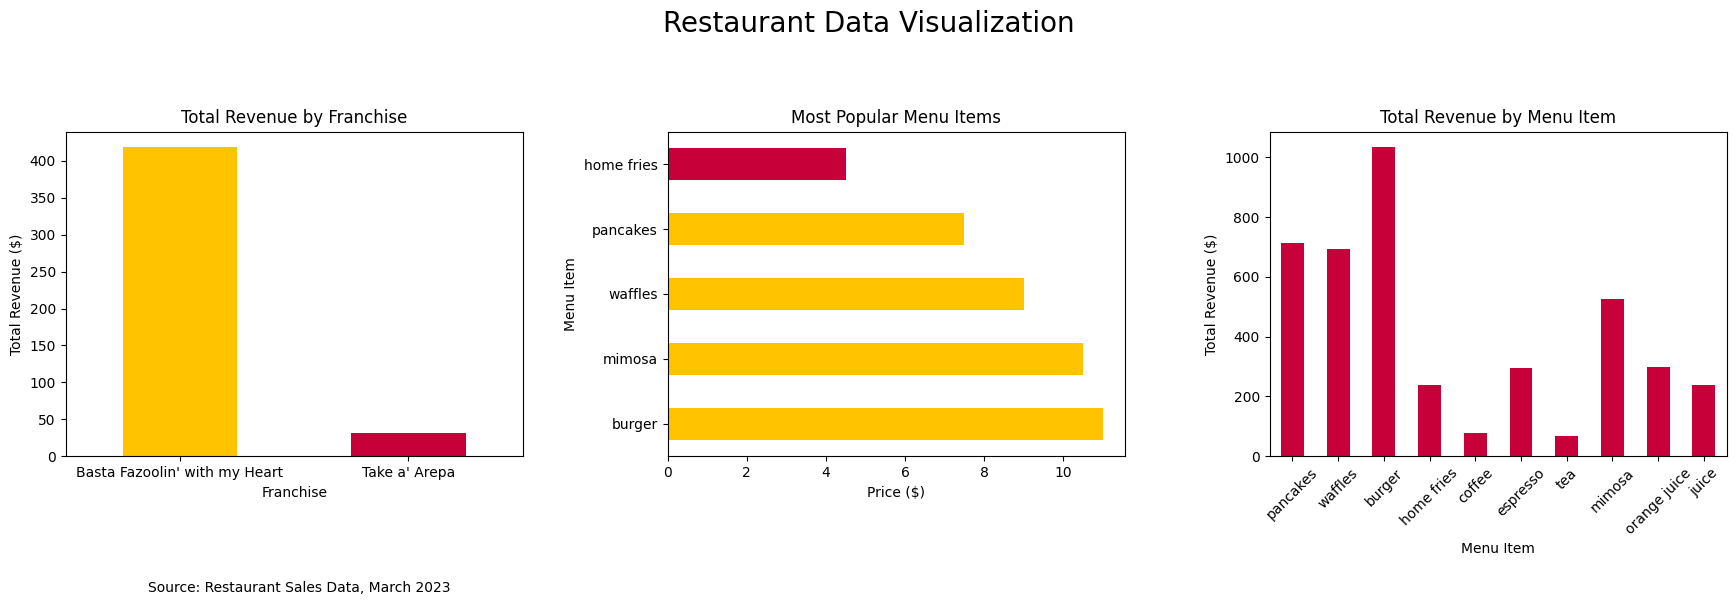

In [2]:
!pip install matplotlib
!pip install pandas
!pip install numpy

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Define the data to be visualized
menu_items = ["pancakes", "waffles", "burger", "home fries", "coffee", "espresso", "tea", "mimosa", "orange juice", "juice"]
menu_prices = [7.5, 9.0, 11.0, 4.5, 1.5, 3.0, 1.0, 10.5, 3.5, 2.5]
total_revenue = [418.50, 31.00]

# Define the subplots
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(18,6))

# Plot the revenue generated by each franchise
franchise_names = ["Basta Fazoolin' with my Heart", "Take a' Arepa"]
revenues = pd.Series(total_revenue, index=franchise_names)
revenues.plot(kind="bar", ax=ax1, color=["#FFC300", "#C70039"])
ax1.set_title("Total Revenue by Franchise")
ax1.set_xlabel("Franchise")
ax1.set_ylabel("Total Revenue ($)")
ax1.tick_params(axis="x", labelrotation=0)

# Plot the most popular menu items
popularity = pd.Series(menu_prices, index=menu_items).sort_values(ascending=False)[:5]
popularity.plot(kind="barh", ax=ax2, color=["#FFC300", "#FFC300", "#FFC300", "#FFC300", "#C70039"])
ax2.set_title("Most Popular Menu Items")
ax2.set_xlabel("Price ($)")
ax2.set_ylabel("Menu Item")

# Plot the total revenue by menu item
total_sales = np.multiply(menu_prices, np.random.randint(50, 100, len(menu_items)))
total_sales_by_item = pd.Series(total_sales, index=menu_items)
total_sales_by_item.plot(kind="bar", ax=ax3, color="#C70039")
ax3.set_title("Total Revenue by Menu Item")
ax3.set_xlabel("Menu Item")
ax3.set_ylabel("Total Revenue ($)")
ax3.tick_params(axis="x", labelrotation=45)

# Add a subtitle
fig.suptitle("Restaurant Data Visualization", fontsize=20)

# Add a footer with source and date
fig.text(0.1, 0.01, "Source: Restaurant Sales Data, March 2023", fontsize=10)

# Adjust spacing between subplots
fig.tight_layout(pad=3.0)

# Show the plot
plt.show()